Downloading all the Required libraries 

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

#Next we need to load the dataset
df=pd.read_csv("houseprediction.csv")
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
data=df[["GrLivArea","BedroomAbvGr","FullBath","SalePrice"]].copy()
data.dropna(inplace=True)
X=data[["GrLivArea","BedroomAbvGr","FullBath"]]
y=data["SalePrice"]
print(X)
print(y)

      GrLivArea  BedroomAbvGr  FullBath
0          1710             3         2
1          1262             3         2
2          1786             3         2
3          1717             3         1
4          2198             4         2
...         ...           ...       ...
1455       1647             3         2
1456       2073             3         2
1457       2340             4         2
1458       1078             2         1
1459       1256             3         1

[1460 rows x 3 columns]
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
mod=LinearRegression()
mod.fit(X_train,y_train)
y_pred=mod.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2_sc=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R2_Score:",r2_sc)

Mean Squared Error: 2575756086.362053
Root Mean Squared Error: 50751.90721896127
R2_Score: 0.630879696575568


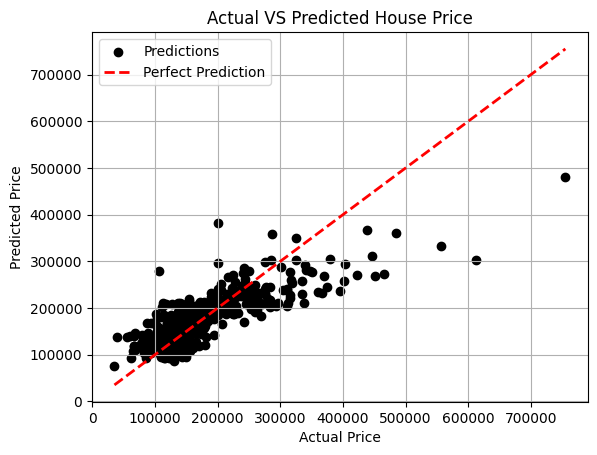

In [9]:
#Now we are visualizing the Actual vs Prediction House Prices 
plt.scatter(y_test,y_pred,color="Black",label="Predictions")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2,label="Perfect Prediction")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted House Price")
plt.legend()
plt.grid(True)
plt.show()